In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
## Now making the neural network 
model = Sequential()
model.add(Dense(64,activation='relu',input_dim = 2))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test),epochs=100)



Epoch 1/100


10/10 [==============================] - 1s 27ms/step - loss: 0.6282 - accuracy: 0.8000 - val_loss: 0.5651 - val_accuracy: 0.8500
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5471 - accuracy: 0.8469 - val_loss: 0.4939 - val_accuracy: 0.8000
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4865 - accuracy: 0.8562 - val_loss: 0.4338 - val_accuracy: 0.8125
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4347 - accuracy: 0.8625 - val_loss: 0.3886 - val_accuracy: 0.8125
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3936 - accuracy: 0.8656 - val_loss: 0.3562 - val_accuracy: 0.8000
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3614 - accuracy: 0.8562 - val_loss: 0.3334 - val_accuracy: 0.8250
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3346 - accuracy: 0.8719 - val_loss: 0.3121 - val_accuracy: 0.8500
Epoch 8

In [15]:
model.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.2460 - accuracy: 0.9125


[0.2460019290447235, 0.9125000238418579]

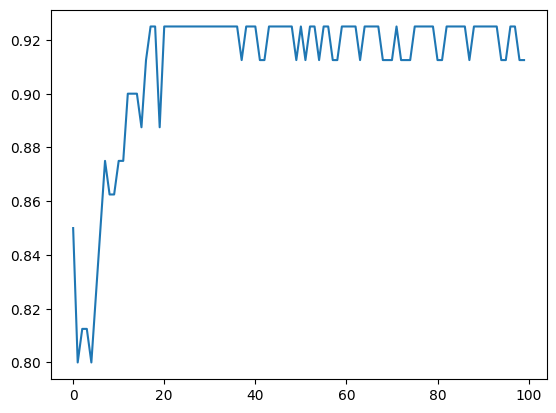

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])